# How to use the Hessian in the Loss Landscape

- Look into optimisers which find the Hessian 
- How do they calculate the Hessian efficiently when there are many parameters

In [87]:
import torch 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()

# get data in dictionary for easy, readable access
'''
IRIS
----

KEY: data
Columns (4) :
    Sepal Length, Sepal Width, Petal Length and Petal Width.
Rows (150) :
    Samples

KEY: feature_names
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

KEY: target
(150) : Categorises each sample into three categories: 0,1,2.

KEY: target_names
(3) : Names categories: setosa, versicolor, virginica

KEY: frame
None

KEY: DESCR
Describes dataset in text

KEY: filename
iris.csv

KEY: data_module
sklearn.datasets.data
'''


"\nIRIS\n----\n\nKEY: data\nColumns (4) :\n    Sepal Length, Sepal Width, Petal Length and Petal Width.\nRows (150) :\n    Samples\n\nKEY: feature_names\n['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']\n\nKEY: target\n(150) : Categorises each sample into three categories: 0,1,2.\n\nKEY: target_names\n(3) : Names categories: setosa, versicolor, virginica\n\nKEY: frame\nNone\n\nKEY: DESCR\nDescribes dataset in text\n\nKEY: filename\niris.csv\n\nKEY: data_module\nsklearn.datasets.data\n"

In [93]:
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
data['target'] = iris['target']
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


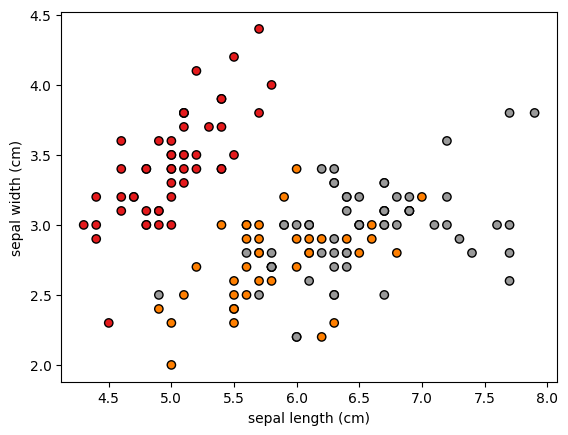

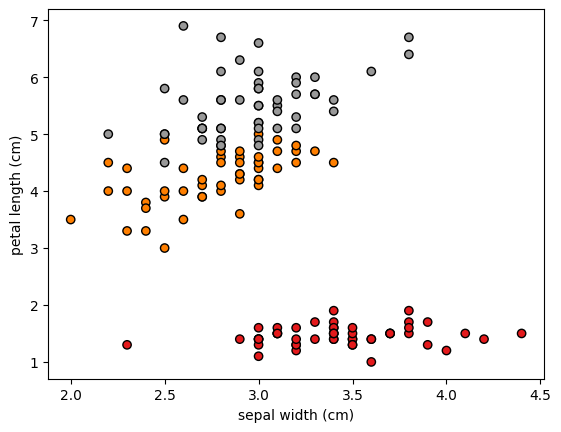

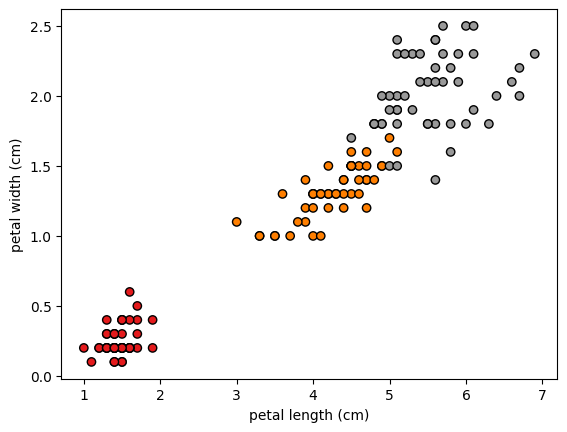

In [100]:
xlabels = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
ylabels = ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for xlabel, ylabel in zip(xlabels, ylabels):
    fig = plt.figure()
    plt.scatter(data[xlabel], data[ylabel], c=data['target'],cmap=plt.cm.Set1, edgecolor="k")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
